In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.covariance import EllipticEnvelope

In [2]:
data=pd.read_csv("Output/X_train_formateado.csv")
data.date=pd.to_datetime(data.date)
data.head(3)

,asset_id,group_id,week,weekday,t1,t2,t3,t4,total_t,week_day,date,day
0,1,2,1,1,NaN,NaN,19.0,0.0,2,1_1,2018-01-01,1
1,1,2,1,2,NaN,NaN,8.0,0.0,2,1_2,2018-01-02,2
2,1,2,1,3,NaN,NaN,9.0,0.0,2,1_3,2018-01-03,3


### Agruparar por asset y graficar series de timpo para 1 asset

In [3]:
data=data.set_index('asset_id')
porAsset=data.groupby(data.index)

## Fitting an elliptic envelope

In [4]:
ASSET=30
t='t3'

asset = porAsset.get_group(ASSET).reset_index()
cov=EllipticEnvelope(random_state=0, assume_centered=False).fit(asset[['day',t]]) 
asset['outlier_'+t]=-(cov.predict(asset[['day',t]]))

asset['outlier_'+t].value_counts()


-1    655
 1     73
Name: outlier_t3, dtype: int64

In [5]:
asset

,asset_id,group_id,week,weekday,t1,t2,t3,t4,total_t,week_day,date,day,outlier_t3
0,30,3,1,1,NaN,NaN,26.0,4.0,2,1_1,2018-01-01,1,-1
1,30,3,1,2,NaN,NaN,62.0,6.0,2,1_2,2018-01-02,2,-1
2,30,3,1,3,NaN,NaN,73.0,2.0,2,1_3,2018-01-03,3,-1
3,30,3,1,4,NaN,NaN,73.0,4.0,2,1_4,2018-01-04,4,-1
4,30,3,1,5,NaN,NaN,57.0,3.0,2,1_5,2018-01-05,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,30,3,104,3,NaN,NaN,97.0,8.0,2,104_3,2019-12-25,724,-1
724,30,3,104,4,NaN,NaN,102.0,7.0,2,104_4,2019-12-26,725,-1
725,30,3,104,5,NaN,NaN,84.0,8.0,2,104_5,2019-12-27,726,-1
726,30,3,104,6,NaN,NaN,58.0,8.0,2,104_6,2019-12-28,727,-1


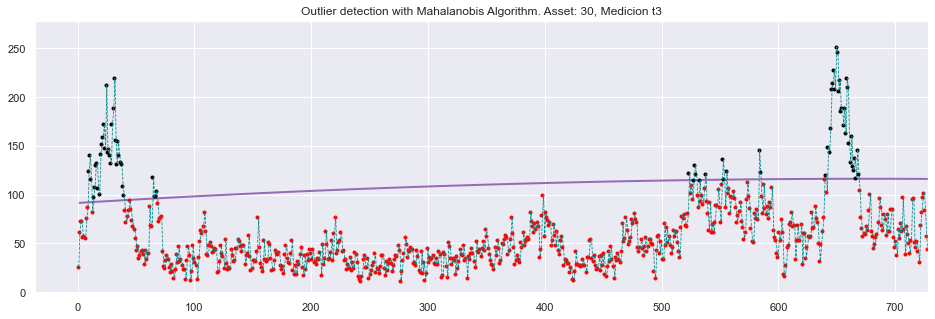

In [6]:

sns.set(rc={'figure.figsize':(16,5)}, palette="muted")
anomalias=asset[asset['outlier_'+t]==-1][t]
normales=asset[asset['outlier_'+t]==1][t]
titulo="Outlier detection with Mahalanobis Algorithm. Asset: "+ str(ASSET)+ ", Medicion "+ t

max_t=int(asset[t].max()+0.1*int(asset[t].max()+20))
n=len(asset)
xx1, yy1 =np.meshgrid(np.linspace(1,n,n),np.linspace(0,max_t,max_t)) #número de días 728 , valore máximo en t3
plt.figure()
Z1=cov.decision_function(np.c_[xx1.ravel(), yy1.ravel()],)
Z1= Z1.reshape(xx1.shape)
legend1_EllipticEnvelope = plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors=['m'])
plt.title(titulo)
plt.plot(anomalias.index,anomalias,'.',color='red')
plt.plot(normales.index, normales, '.', color= 'black')

plt.plot(asset['day'],asset[t],ls='--',color='darkcyan', linewidth=.8)
plt.show()